# Classification non supervisée avec le KMEANS

Problématique à résoudre : 

![Capture d'écran du genre "Gorilla dans site iNaturalist"](image.png)

Dans le genre Gorilla dans le site iNaturalist, les Gorilles sont classés en 2 catégories : Gorilles de l'Est et Gorilles de l'Est.
Cependant, dans notre extraction, nous n'obtenons que les sous-espèces, et donc n'avons pas de champ pour les différencier. Nous allons tenter de le faire avecl'algorithme des KMEANS

![Alt text](image-1.png)

Pas de champs permettant de séparer juste entre les 2 espèces :


![Alt text](image-2.png)

Les Gorilles de l'Est et de l'Ouest vivant dans deux zones géographiques différentes, comme leur nom l'indique, l'algorithme KMEANS va permettre de les différencier en 2 groupes distinct, sans supervision mais seulement avec leur géolocalisation (latitude / longitude)

### I- Import des bibliothèques nécessaires
Commençons par importer les bibliothèques Python nécessaires pour notre analyse.

In [65]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.metrics import silhouette_score
import plotly.express as px

### II- Chargement des données

Import du fichier généré via KNIME. Le séparateur est le pipe

In [66]:
data = pd.read_csv('Genre_gorilla.csv', sep="|")

Visualisation du dataframe

In [67]:
data

,eventDate,decimalLatitude,decimalLongitude,countryCode,stateProvince,taxonID
0,2022-04-08,-2.998760,10.053514,GA,Nyanga,147662
1,2018-06-20,-1.112909,29.694889,UG,Kanungu,147661
2,2012-02-20,6.026456,9.235325,CM,Sud-Ouest,126105
3,2012-02-17,6.082184,9.690293,CM,Sud-Ouest,126105
4,2013-06-13,-1.550271,29.477593,RW,Amajyaruguru,147661
...,...,...,...,...,...,...
468,2021-12-01,-0.922922,29.676541,UG,Kanungu,147661
469,2021-12-01,-0.889372,29.730451,UG,Kanungu,147661
470,2021-12-01,-0.960235,29.751352,UG,Kanungu,147661
471,2019-09-05,-1.577534,29.493780,RW,Amajyaruguru,147661


Suppression des colonnes inutiles

In [68]:
data.drop('countryCode', axis=1, inplace=True)
data.drop('stateProvince', axis=1, inplace=True)
data.drop('taxonID', axis=1, inplace=True)
data.drop('eventDate', axis=1, inplace=True)

On ne garde que les lignes avec longitude et latitude renseignées

In [69]:
data.dropna(inplace=True)

## II- Exploration des données

Afficher les premières lignes des données

In [70]:
data.head(10)

,decimalLatitude,decimalLongitude
0,-2.998760,10.053514
1,-1.112909,29.694889
2,6.026456,9.235325
3,6.082184,9.690293
4,-1.550271,29.477593
5,-1.048757,29.629820
6,-1.110228,29.667004
7,-1.472442,29.508508
8,-1.423912,29.451823
9,-1.411749,29.501393


Description du dataframe

In [71]:
data.describe()

,decimalLatitude,decimalLongitude
count,470.000000,470.000000
mean,-0.855898,25.883746
std,1.238649,6.848572
min,-4.040769,9.218115
25%,-1.434905,29.388122
50%,-1.138568,29.611336
75%,-0.977758,29.698136
max,6.285688,29.992060


Informations sur le dataframe

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 470 entries, 0 to 472
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   decimalLatitude   470 non-null    float64
 1   decimalLongitude  470 non-null    float64
dtypes: float64(2)
memory usage: 11.0 KB


Visualisation des données :

In [73]:
# Créez une carte en utilisant Plotly Express
fig = px.scatter_geo(data, 
                     lat='decimalLatitude', 
                     lon='decimalLongitude', 
                     title='Latitude - longitude des observations, 2 espèces confondues')

fig.show()

## III- Application du modèle KMeans

Initialisation du modèle. On sait qu'on recherche 2 clusters, pour "Gorilles de l'Est" et "Gorilles de l'Ouest"

In [74]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=200)

Entraînement du modèle sur l'ensemble d'entraînement

In [75]:
kmeans.fit(data)

KMeans(n_clusters=2, n_init=200, random_state=42)

## VI- Évaluation du modèle
Une fois que notre modèle est entraîné, nous pouvons l'évaluer en utilisant l'ensemble de test.

### Calcul de l'inertie

L'inertie est une mesure de la somme des carrés des distances entre chaque point de données et le centre du cluster auquel il appartient. 

L'inertie mesure à quel point les données sont regroupées autour de leurs centres de clusters respectifs. Une inertie plus faible indique généralement que les points sont plus proches de leur centre de cluster, ce qui est souhaitable car cela signifie que les clusters sont plus compacts.

In [76]:
inertia = kmeans.inertia_
inertia

1118.4688085468872



Ici, une inertie de 1118.47 signifie que les points du jeu de données sont relativement proches de leurs centres de clusters respectifs, ce qui suggère que K-Means a trouvé des clusters bien définis dans les données.

Ce résultat est donc satisfaisant

### Calcul de silhouette_avg

Le score de silhouette est une mesure de la qualité de la séparation entre les clusters obtenue par l'algorithme K-Means. 

Il varie de -1 à 1, où :
- Une valeur proche de 1 indique que les clusters sont bien séparés et que chaque point est plus proche des points de son propre cluster que des autres clusters.
- Une valeur proche de 0 indique que les clusters se chevauchent.
- Une valeur proche de -1 indique que les points sont incorrectement attribués à des clusters.

In [77]:
silhouette_avg = silhouette_score(data, kmeans.labels_)
silhouette_avg

0.9287076559389643

Ici, un score de silhouette de 0.93 est très élevé, ce qui suggère une très bonne séparation entre les clusters. Cela indique que les points à l'intérieur d'un cluster sont très similaires les uns aux autres et très différents des points des autres clusters.

Ce résultat est également satisfaisant, l'algorithme des KMEANS a bien pu séparer 2 groupes distincts.

## VII- Visualisation des clusters

Coordonées des points trouvés pour les clusters :

In [78]:
kmeans.cluster_centers_

array([[-1.20647808, 29.61452629],
       [ 0.29145488, 13.67392064]])

Par curiosité, on regarde le tableau des résultats obtenus. On a bien 2 groupes distincts : les 0 et les 1

In [79]:
result_array = kmeans.labels_
result_array

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

Représentation graphique de la données et des clusters obtenus

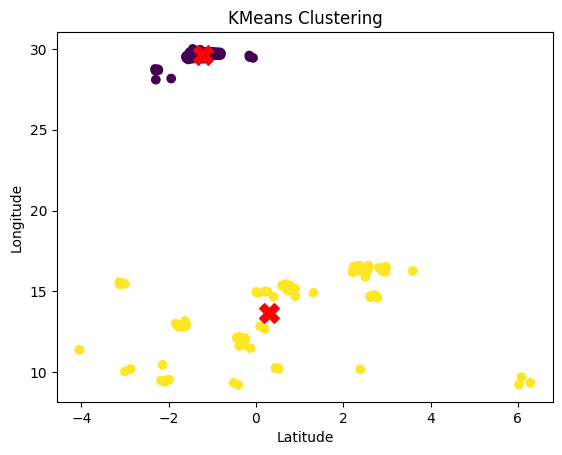

In [80]:
plt.scatter(data["decimalLatitude"], data["decimalLongitude"], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', color='red', s=200)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('KMeans Clustering')
plt.show()



Les 2 groupes sont effectivement bien distincts

## VIII- Vérification du nombre K de clusters (retrouver k=2 par la méthode du coude)

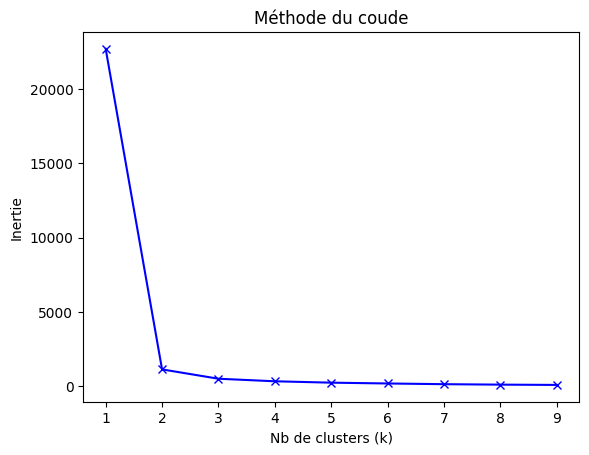

In [53]:
inertia = []
k_values = range(1, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=200, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, 'bx-')
plt.xlabel('Nb de clusters (k)')
plt.ylabel('Inertie')
plt.title('Méthode du coude')
plt.show()

Le coude est bien visible à k=2. Cela confirme la séparation "principale" des observations du genre Gorilla en 2 groupes distincts.

## IX- Vérification de la bonne classification selon les observations

In [81]:
df_verif = pd.read_csv('Genre_gorilla.csv', sep="|")
df_verif.dropna(inplace=True)
df_verif["KMEANS_classification"] = result_array

In [82]:
df_verif

,eventDate,decimalLatitude,decimalLongitude,countryCode,stateProvince,taxonID,KMEANS_classification
0,2022-04-08,-2.998760,10.053514,GA,Nyanga,147662,1
1,2018-06-20,-1.112909,29.694889,UG,Kanungu,147661,0
2,2012-02-20,6.026456,9.235325,CM,Sud-Ouest,126105,1
3,2012-02-17,6.082184,9.690293,CM,Sud-Ouest,126105,1
4,2013-06-13,-1.550271,29.477593,RW,Amajyaruguru,147661,0
...,...,...,...,...,...,...,...
468,2021-12-01,-0.922922,29.676541,UG,Kanungu,147661,0
469,2021-12-01,-0.889372,29.730451,UG,Kanungu,147661,0
470,2021-12-01,-0.960235,29.751352,UG,Kanungu,147661,0
471,2019-09-05,-1.577534,29.493780,RW,Amajyaruguru,147661,0


En regardant une à une "à la main" les sous-espèce du genre "Gorilla" obtenues dans l'extraction de iNaturalist puis KNIME, on peut reconstituer les 2 groupes d'une autre façon.
Comparons cela au résultat obtenu par KMEANS.

In [56]:
#Correspondance entre les sous-espèces et les 2 taxons (obtenu par une méthode différente du KMEANS)

# https://www.inaturalist.org/observations?taxon_id=<taxonID>
# 147661 : Est
# 147662 : Ouest
# 68790 : Est
# 147660 : Est
# 43580 : Ouest
# 126105 : Ouest


df_verif["real_classification"] = df_verif["taxonID"].replace({147661 : 0, 147662 : 1, 68790 : 0, 147660 : 0, 43580 : 1, 126105 : 1})

In [57]:
df_verif

,eventDate,decimalLatitude,decimalLongitude,countryCode,stateProvince,taxonID,KMEANS_classification,real_classification
0,2022-04-08,-2.998760,10.053514,GA,Nyanga,147662,1,1
1,2018-06-20,-1.112909,29.694889,UG,Kanungu,147661,0,0
2,2012-02-20,6.026456,9.235325,CM,Sud-Ouest,126105,1,1
3,2012-02-17,6.082184,9.690293,CM,Sud-Ouest,126105,1,1
4,2013-06-13,-1.550271,29.477593,RW,Amajyaruguru,147661,0,0
...,...,...,...,...,...,...,...,...
468,2021-12-01,-0.922922,29.676541,UG,Kanungu,147661,0,0
469,2021-12-01,-0.889372,29.730451,UG,Kanungu,147661,0,0
470,2021-12-01,-0.960235,29.751352,UG,Kanungu,147661,0,0
471,2019-09-05,-1.577534,29.493780,RW,Amajyaruguru,147661,0,0


Tableau des différence de résultat entre les deux méthodes :

In [58]:
df_verif_diff = df_verif[df_verif["KMEANS_classification"] != df_verif["real_classification"]]

In [59]:
df_verif_diff

,eventDate,decimalLatitude,decimalLongitude,countryCode,stateProvince,taxonID,KMEANS_classification,real_classification


Le tableau ci-dessus étant vide, toutes les observations de Gorilles ont bien été classées comme il devrait.